<a href="https://colab.research.google.com/github/AadamHaq/Machine-Learning---Cardiovascular-Disease-Dataset-Exploration/blob/main/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Investigation
## Aadam Ul Haq

Can the use of Machine Learning techniques help to diagnose cardiovascular disease?

---

##  Read dataset and Outlier Investigation

In [1]:
# Imports
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('cardio_data_processed.csv')

column_names_array = df.columns.to_numpy()

# Print the array
print(column_names_array)
# Filter numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Define a threshold for outliers (three standard deviations) - decided by investigation, see report
threshold = 3
columns_to_exclude = ['id', 'gender', 'smoke', 'alco', 'cholesterol', 'gluc', 'active', 'cardio']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Identify outliers in numerical columns
numerical_outliers = df[numerical_columns].apply(lambda x: x[abs(x - x.mean()) > threshold * x.std()])

print("Threshold for outliers (three standard deviations):", threshold)
print("Number of outliers across numerical columns (excluding specified columns):", len(numerical_outliers))
print("Outliers across numerical columns (excluding specified columns):")
print(numerical_outliers)

['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio' 'age_years' 'bmi' 'bp_category'
 'bp_category_encoded']
Threshold for outliers (three standard deviations): 3
Number of outliers across numerical columns (excluding specified columns): 2009
Outliers across numerical columns (excluding specified columns):
       age  height  weight  ap_hi  ap_lo  age_years        bmi
59     NaN     NaN     NaN  180.0    NaN        NaN        NaN
61     NaN     NaN     NaN  180.0    NaN        NaN        NaN
83     NaN     NaN     NaN    NaN    NaN        NaN  47.610803
97     NaN     NaN     NaN    NaN  110.0        NaN        NaN
114    NaN     NaN     NaN    NaN  110.0        NaN        NaN
...    ...     ...     ...    ...    ...        ...        ...
67919  NaN     NaN     NaN    NaN    NaN        NaN  55.459105
68040  NaN     NaN     NaN  180.0    NaN        NaN        NaN
68135  NaN     NaN     NaN    NaN  110.0        NaN        NaN
68201

In [2]:
# Remove outliers found from dataset
threshold = 3
columns_to_exclude = ['id', 'gender', 'smoke', 'alco', 'cholesterol', 'gluc', 'active', 'cardio']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Identify outliers in numerical columns
outliers_mask = df[numerical_columns].apply(lambda x: abs(x - x.mean()) > threshold * x.std()).any(axis=1)

# Remove rows with outliers
df_no_outliers = df[~outliers_mask]

print("Threshold for outliers (three standard deviations):", threshold)
print("Number of outliers across numerical columns (excluding specified columns):", outliers_mask.sum())
print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Threshold for outliers (three standard deviations): 3
Number of outliers across numerical columns (excluding specified columns): 2009
DataFrame shape before removing outliers: (68205, 17)
DataFrame shape after removing outliers: (66196, 17)


In [3]:
# Create new csv with data
df_no_outliers.to_csv('cardio_data_no_outliers.csv', index=False)
df_no_outliers.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


---

## Scale data for ML models

Scale the data for certain ML models and also conduct some feature analysis and further analysis of the data to see if outlier threshold chosen is correct.

In [4]:
# Scale data for ML use

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your CSV file
df = pd.read_csv('cardio_data_processed.csv')

# Extract the target column
target_column = df['cardio']

# Identify one-hot encoded columns
one_hot_columns = ['gender','cholesterol','alco', 'gluc','smoke','active','bp_category','bp_category_encoded', 'id']

# Identify and separate numerical and one-hot encoded categorical features
numerical_columns = [col for col in df.columns if col not in one_hot_columns]
df_numerical = df[numerical_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data using the scaler
scaled_numerical = scaler.fit_transform(df_numerical)

# Create a new DataFrame with scaled numerical data and categorical data
df_scaled_old = pd.DataFrame(scaled_numerical, columns=numerical_columns)
df_scaled_old[one_hot_columns] = df[one_hot_columns]  # Add the one-hot encoded columns back
df_scaled_old['cardio'] = target_column  # Add the target column back

desired_column_order = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category',
 'bp_category_encoded']  # Adjust with your actual column names and order

df_scaled = df_scaled_old[desired_column_order]

# Save the scaled DataFrame to a new CSV file
df_scaled.to_csv('cardio_data_scaled.csv', index=False)


In [5]:
df_scaled.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,-0.433351,2,0.443595,-0.846868,-1.029656,-0.138226,1,1,0,0,1,0,-0.417089,-0.919843,Hypertension Stage 1,Hypertension Stage 1
1,1,0.310057,1,-1.023991,0.762789,0.849859,0.955397,3,1,0,0,1,1,0.321479,1.230768,Hypertension Stage 2,Hypertension Stage 2
2,2,-0.245372,1,0.076698,-0.706898,0.223354,-1.231849,3,1,0,0,0,1,-0.269376,-0.664190,Hypertension Stage 1,Hypertension Stage 1
3,3,-0.745298,2,0.565893,0.552834,1.476363,2.049021,1,1,0,0,1,1,-0.712516,0.199116,Hypertension Stage 2,Hypertension Stage 2
4,4,-0.805662,1,-1.023991,-1.266778,-1.656161,-2.325472,1,1,0,0,0,0,-0.860230,-0.746598,Normal,Normal


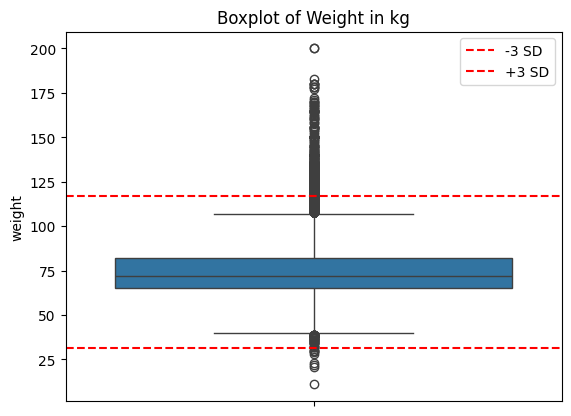

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('cardio_data_processed.csv')
sns.boxplot(data['weight'])
mean_value = data['weight'].mean()
std_dev = data['weight'].std()

# Add lines for three standard deviations above and below the mean
plt.axhline(mean_value - 3 * std_dev, color='red', linestyle='--', label='-3 SD')
plt.axhline(mean_value + 3 * std_dev, color='red', linestyle='--', label='+3 SD')


plt.legend()

plt.title('Boxplot of Weight in kg')
plt.show()

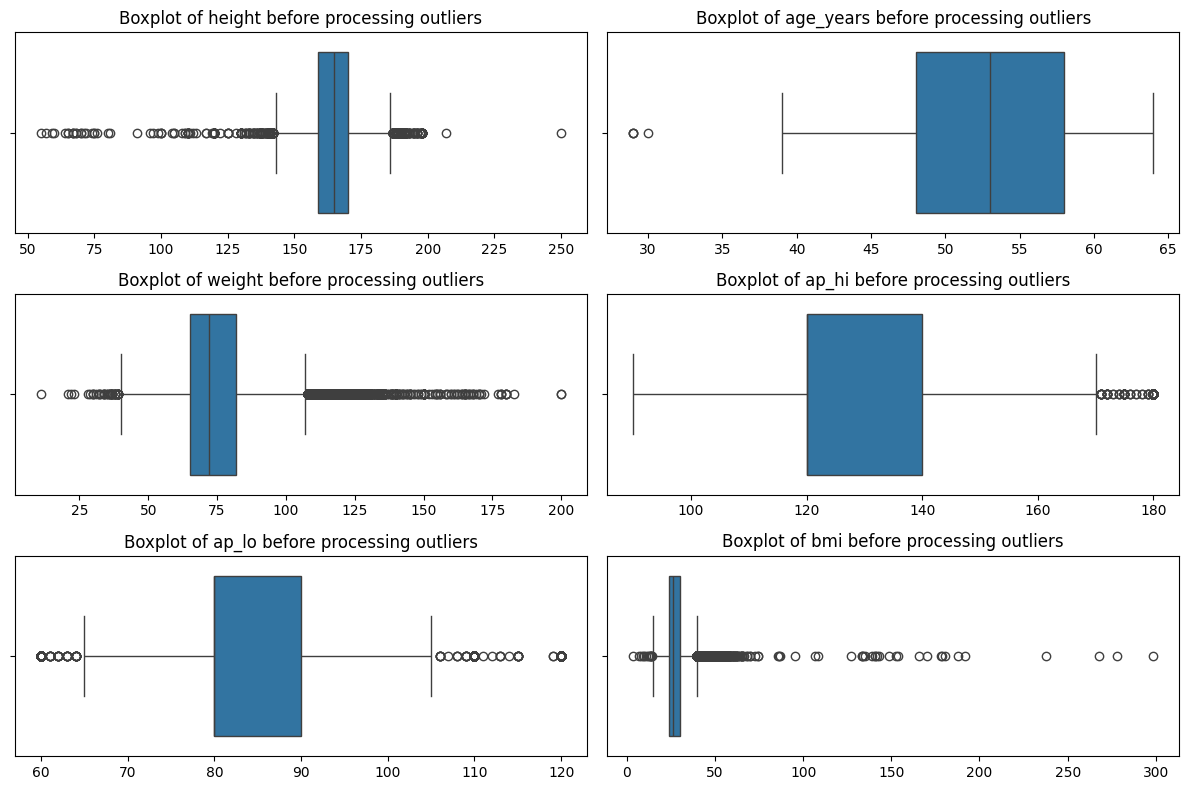

In [7]:
data = pd.read_csv('cardio_data_processed.csv')
num_features = ['height', 'age_years','weight', 'ap_hi', 'ap_lo', 'bmi']


fig, axs = plt.subplots(3,2, figsize=(12,8))
axs = axs.flatten()

for cat,ax in zip(num_features,axs):
    sns.boxplot(x = data[cat], ax = ax)
    ax.set_title(f'Boxplot of {cat} before processing outliers')
    ax.set_xlabel('')

plt.tight_layout()

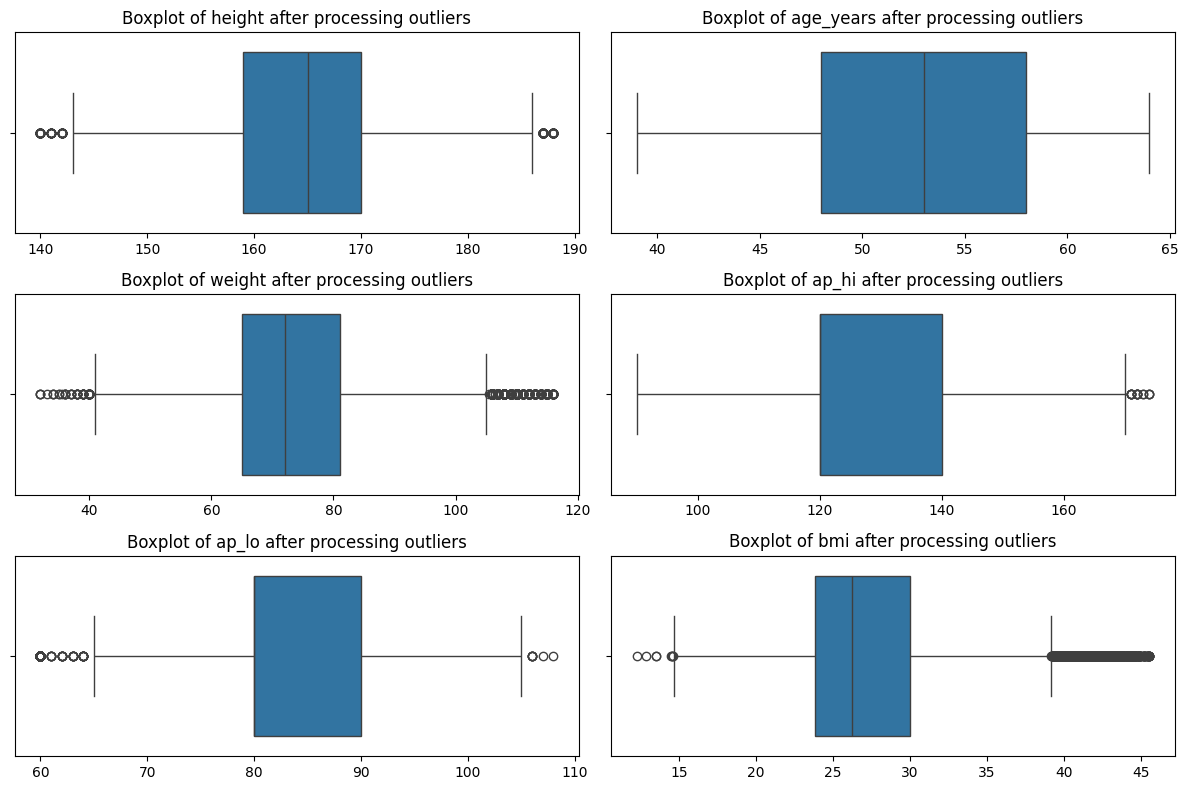

In [23]:
data = pd.read_csv('cardio_data_no_outliers.csv')

num_features = ['height', 'age_years','weight', 'ap_hi', 'ap_lo', 'bmi']


fig, axs = plt.subplots(3,2, figsize=(12,8))
axs = axs.flatten()

for cat,ax in zip(num_features,axs):
    sns.boxplot(x = data[cat], ax = ax)
    ax.set_title(f'Boxplot of {cat} after processing outliers')
    ax.set_xlabel('')

plt.tight_layout()

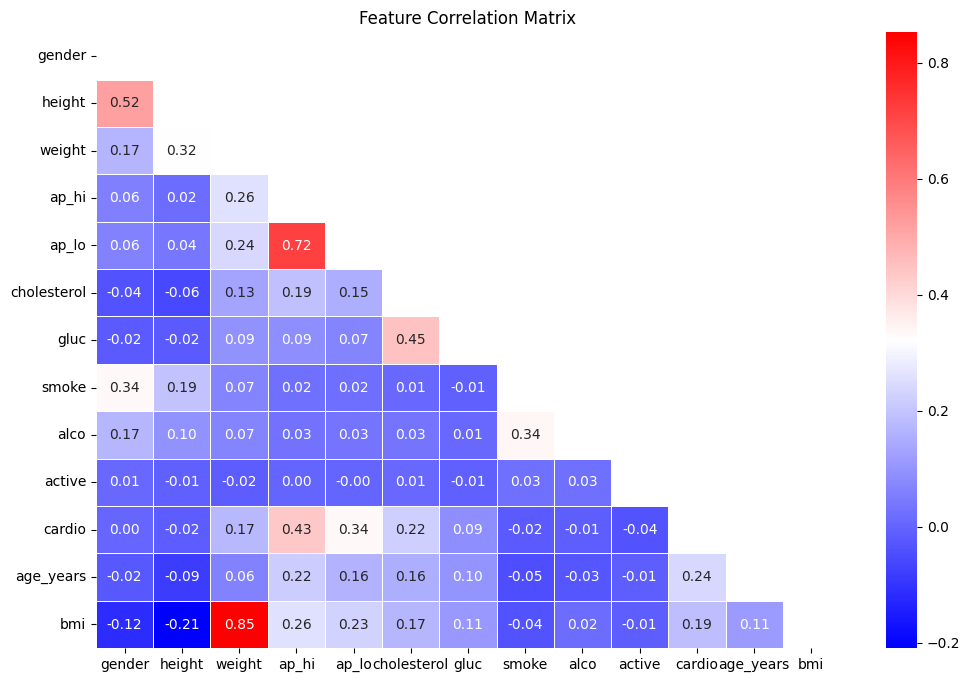

In [24]:
data = data.drop(['id','age', 'bp_category', 'bp_category_encoded'], axis=1)
corr= data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)


# using the upper triangle matrix as mask
plt.figure(figsize=(12,8))
sns.heatmap(corr , annot=True, fmt=".2f", cmap="bwr", linewidths=0.5, mask=matrix)
plt.title('Feature Correlation Matrix')
plt.show()

<ipython-input-29-e93a9658d68f>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')  # Rotate x-axis labels
<ipython-input-29-e93a9658d68f>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')  # Rotate x-axis labels
<ipython-input-29-e93a9658d68f>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')  # Rotate x-axis labels


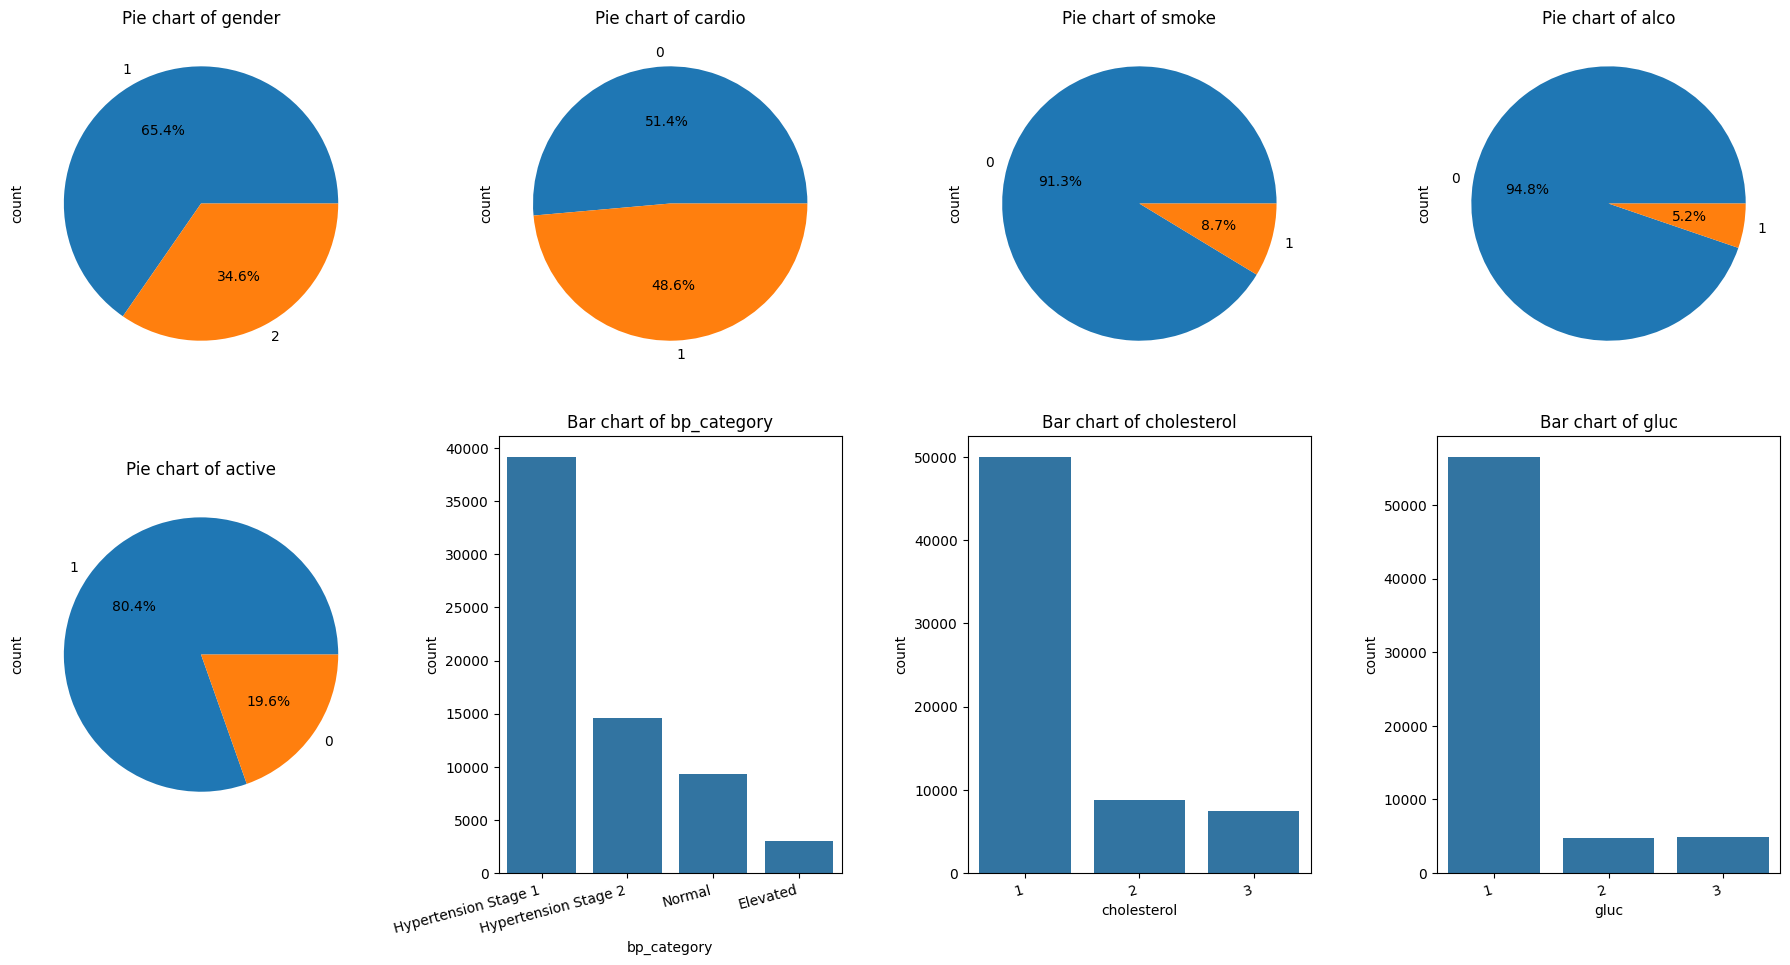

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cardio_data_no_outliers.csv')
cat_features = ['gender', 'cardio', 'smoke', 'alco', 'active', 'bp_category', 'cholesterol', 'gluc']

# Create subplots for the pie charts and bar charts
fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs = axs.flatten()

# Plot pie charts for the first five categories
for cat, ax in zip(cat_features[:5], axs[:5]):
    data[cat].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    ax.set_title(f'Pie chart of {cat}')
    ax.set_xlabel('')
    ax.set_aspect('equal')  # Set aspect ratio for the pie chart

# Plot bar charts for the last three categories with adjusted figure size
palette = sns.color_palette("pastel")
for cat, ax in zip(cat_features[5:], axs[5:]):
    sns.countplot(x=data[cat], ax=ax)
    ax.set_title(f'Bar chart of {cat}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


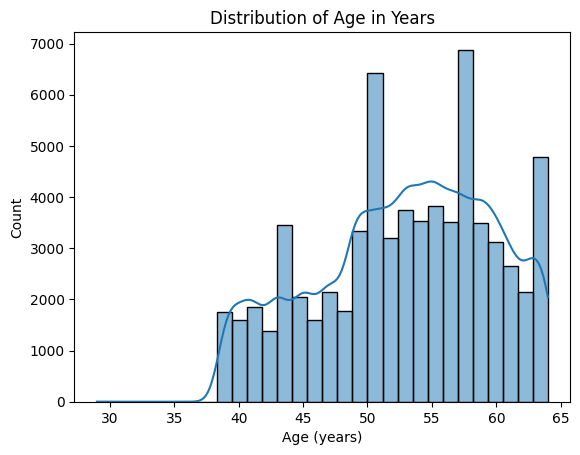

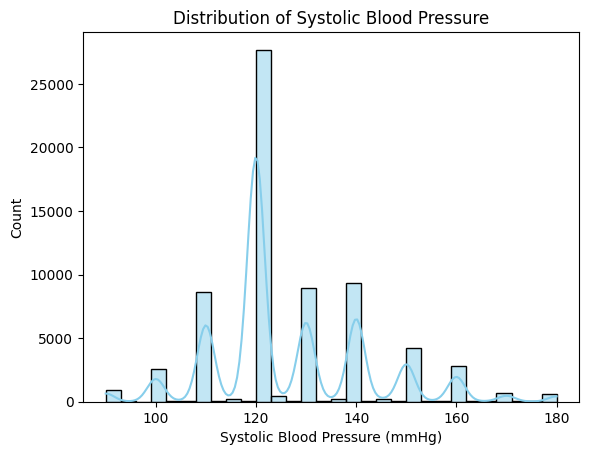

In [38]:
# Univariate Analysis
data = pd.read_csv('cardio_data_processed.csv')
sns.histplot(data['age_years'], kde=True, bins=30)
plt.title('Distribution of Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

sns.histplot(data['ap_hi'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

---

## Machine Learning

Test multiple machine learning types to see the performance (May take a while to run)

In [30]:
# Import all packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV

In [31]:
# Train-test split
data = pd.read_csv('cardio_data_processed.csv')
data = pd.get_dummies(data, columns=['bp_category'], drop_first=True)
y = data['cardio']
X = data.drop('cardio', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Drop the 'bp_category_encoded' column
if 'bp_category_encoded' in X_train.columns:
    X_train = X_train.drop(columns=['bp_category_encoded'])
    X_val = X_val.drop(columns=['bp_category_encoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


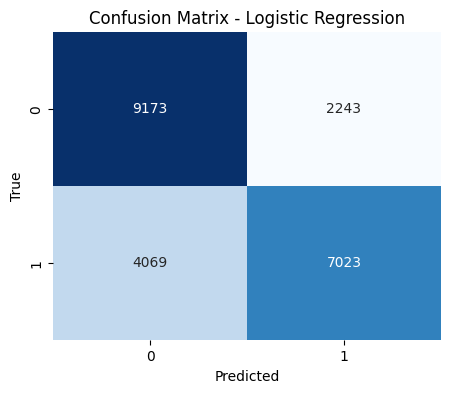

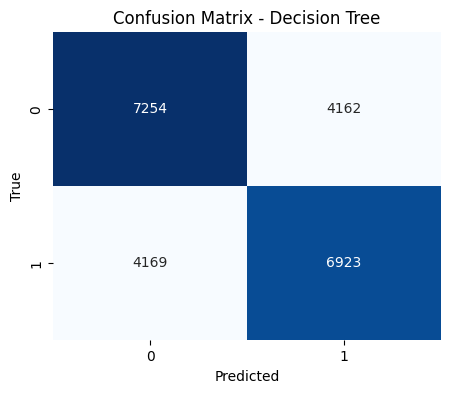

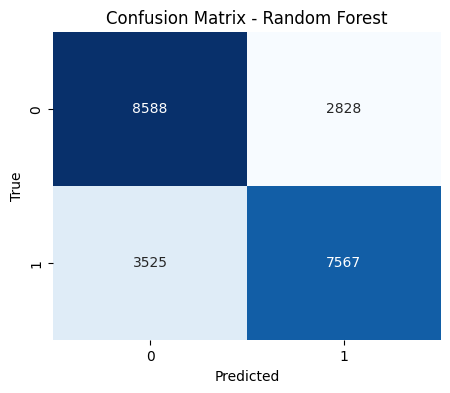

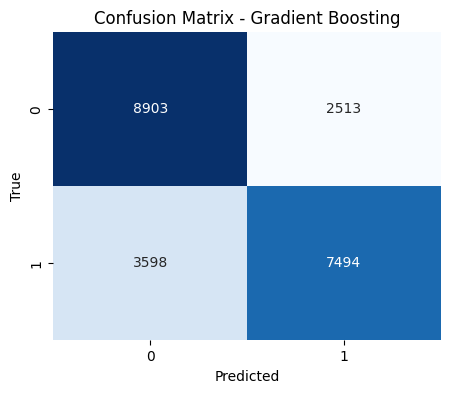

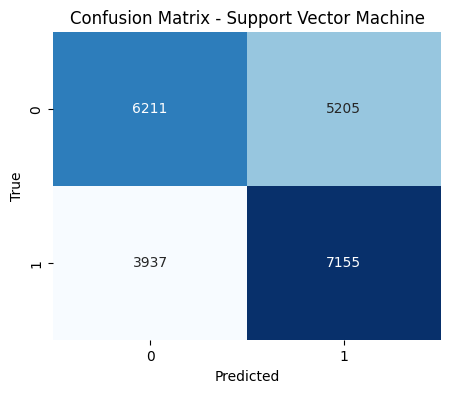

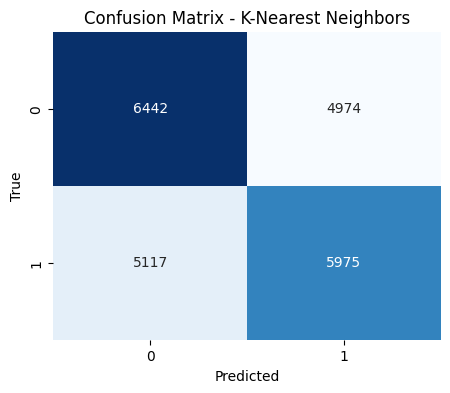

                    Model  Accuracy   ROC AUC
0     Logistic Regression  0.719566  0.783865
1           Decision Tree  0.629865  0.629784
2           Random Forest  0.717745  0.777378
3       Gradient Boosting  0.728497  0.794574
4  Support Vector Machine  0.593833  0.634615
5     K-Nearest Neighbors  0.551671  0.569279


In [32]:
# Create confusion matrices

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_val, y_train, y_val are already defined

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    # Compute and display confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results.append([name, accuracy, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print(results_df)


         Model  Accuracy   ROC AUC              Confusion Matrix
0  Naive Bayes  0.706815  0.773938  [[9338, 2078], [4521, 6571]]


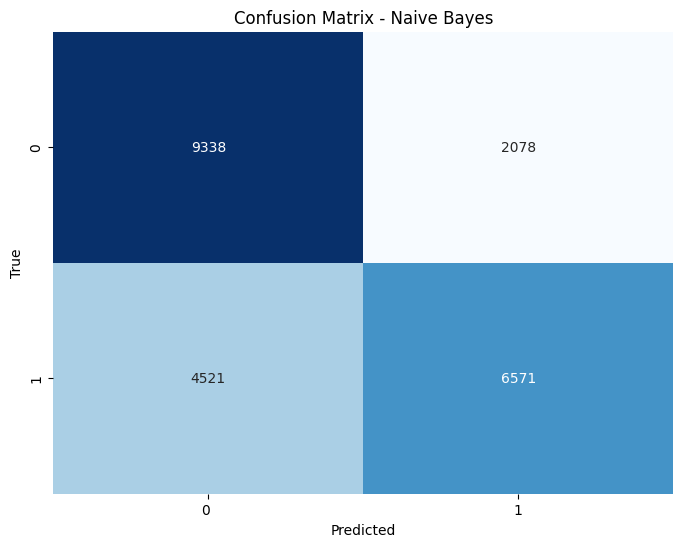

In [33]:
# Compute Naiive Bayes as well with some more metrics

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes (Gaussian Naive Bayes) model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred_nb = nb_model.predict(X_val)

# Calculate metrics
accuracy_nb = accuracy_score(y_val, y_pred_nb)
roc_auc_nb = roc_auc_score(y_val, nb_model.predict_proba(X_val)[:, 1])
conf_matrix_nb = confusion_matrix(y_val, y_pred_nb)

# Display results
results_nb = pd.DataFrame([["Naive Bayes", accuracy_nb, roc_auc_nb, conf_matrix_nb]],
                          columns=["Model", "Accuracy", "ROC AUC", "Confusion Matrix"])
print(results_nb)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["0 ", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


               Model  Accuracy   ROC AUC              Confusion Matrix
0  Gradient Boosting  0.728497  0.794573  [[8903, 2513], [3598, 7494]]


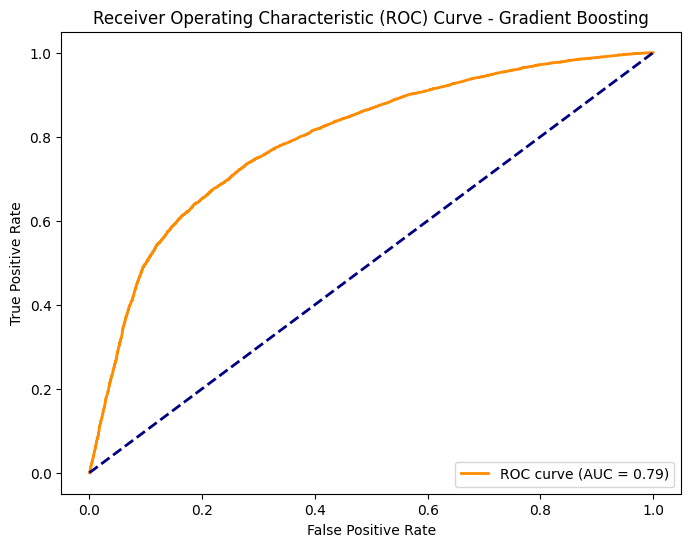

In [34]:
# Find roc auc etc for other models - adjusted this cell to find it for all models while writing the report
# Got the graph for gradient boosting as that was the best model

import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred_gb = gb_model.predict(X_val)
y_prob_gb = gb_model.predict_proba(X_val)[:, 1]

# Calculate metrics
accuracy_gb = accuracy_score(y_val, y_pred_gb)
roc_auc_gb = roc_auc_score(y_val, y_prob_gb)
conf_matrix_gb = confusion_matrix(y_val, y_pred_gb)

# Display results
results_gb = pd.DataFrame([["Gradient Boosting", accuracy_gb, roc_auc_gb, conf_matrix_gb]],
                          columns=["Model", "Accuracy", "ROC AUC", "Confusion Matrix"])
print(results_gb)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


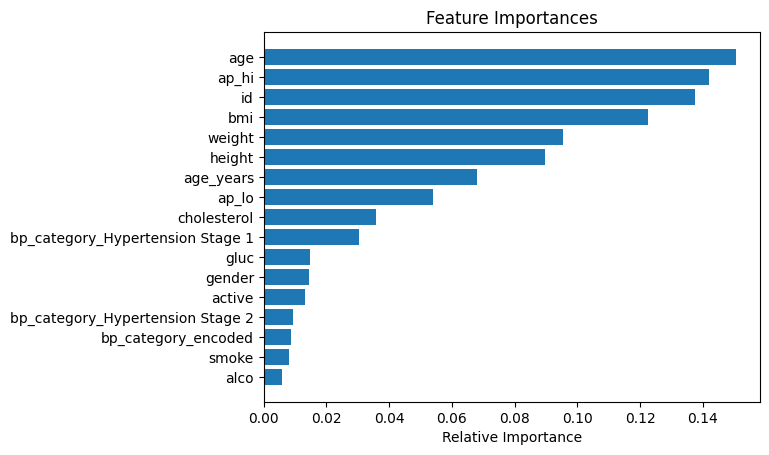

In [35]:
# Investigate feature importance of Random Forest to see what affects outcome the most
# This directly shows what affects cardiovascular disease according to the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

features = X.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

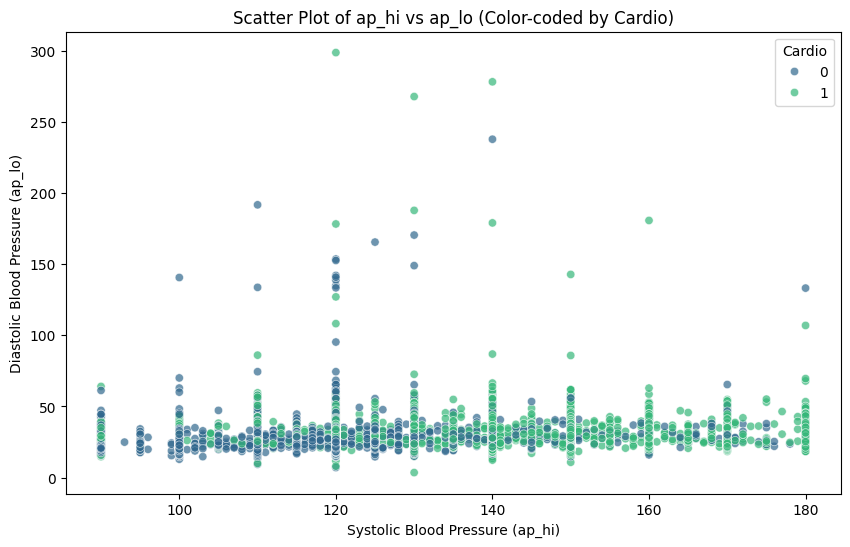

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with color-coded points based on 'cardio'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='bmi', hue='cardio', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of ap_hi vs ap_lo (Color-coded by Cardio)')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.legend(title='Cardio', loc='upper right')
plt.show()
